# Custom Datasets

In [62]:
import torch
from torch import nn

In [63]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [64]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
        f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", 'r') as zip_ref:
     print("Unzipping pizza, steak, sushi data...")
     zip_ref.extractall(image_path)   
            

data\pizza_steak_sushi directory already exists
Unzipping pizza, steak, sushi data...


In [65]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [66]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [67]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'


Random image path: data\pizza_steak_sushi\train\pizza\1044789.jpg
Image class: pizza
Image height: 512
Image width: 512


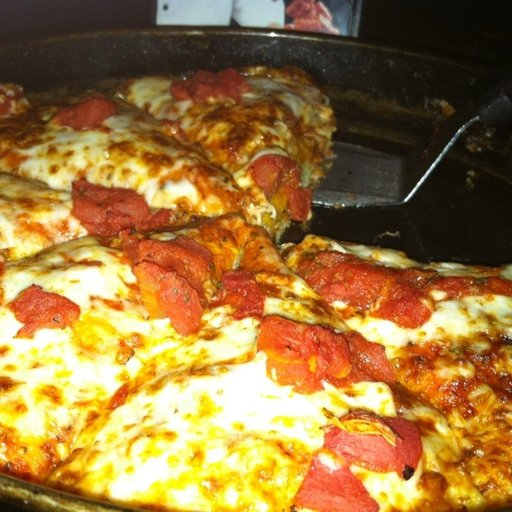

In [68]:
import random
from PIL import Image


#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)


image_class = random_image_path.parent.stem


img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

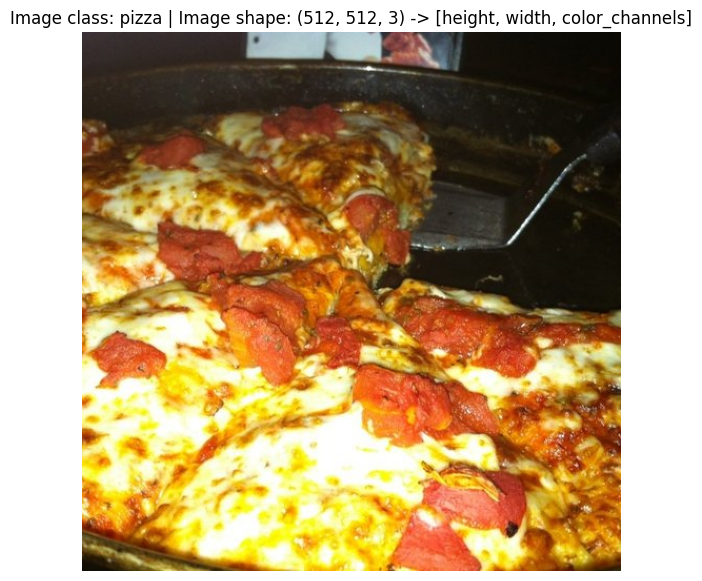

In [69]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [70]:
img_as_array

array([[[60, 50, 58],
        [60, 50, 58],
        [59, 49, 57],
        ...,
        [10,  9,  4],
        [10,  9,  4],
        [10,  9,  4]],

       [[59, 49, 57],
        [59, 49, 57],
        [59, 49, 57],
        ...,
        [10,  9,  4],
        [10,  9,  4],
        [10,  9,  4]],

       [[58, 49, 54],
        [58, 49, 54],
        [58, 49, 54],
        ...,
        [10,  9,  4],
        [10,  9,  4],
        [10,  9,  4]],

       ...,

       [[17, 13,  4],
        [17, 13,  4],
        [18, 14,  5],
        ...,
        [50, 35,  6],
        [51, 36,  5],
        [51, 36,  5]],

       [[17, 13,  4],
        [17, 13,  4],
        [17, 13,  4],
        ...,
        [51, 42, 13],
        [52, 43, 12],
        [52, 43, 12]],

       [[18, 14,  5],
        [17, 13,  4],
        [17, 13,  4],
        ...,
        [52, 45, 16],
        [52, 47, 17],
        [52, 47, 15]]], shape=(512, 512, 3), dtype=uint8)

In [71]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
]
)

In [72]:
data_transform(img)

tensor([[[0.2314, 0.2314, 0.2275,  ..., 0.0431, 0.0392, 0.0392],
         [0.2196, 0.2235, 0.2196,  ..., 0.0392, 0.0392, 0.0392],
         [0.2118, 0.2118, 0.2078,  ..., 0.0392, 0.0392, 0.0392],
         ...,
         [0.4039, 0.4863, 0.5373,  ..., 0.7961, 0.8078, 0.8118],
         [0.1608, 0.2000, 0.2902,  ..., 0.6392, 0.6157, 0.5176],
         [0.0784, 0.0902, 0.1216,  ..., 0.3686, 0.3333, 0.2863]],

        [[0.1922, 0.1922, 0.1922,  ..., 0.0392, 0.0353, 0.0353],
         [0.1843, 0.1843, 0.1804,  ..., 0.0353, 0.0353, 0.0353],
         [0.1765, 0.1725, 0.1765,  ..., 0.0353, 0.0353, 0.0353],
         ...,
         [0.3176, 0.4000, 0.4588,  ..., 0.5294, 0.5373, 0.5804],
         [0.1098, 0.1373, 0.2196,  ..., 0.3882, 0.3765, 0.2941],
         [0.0588, 0.0706, 0.0863,  ..., 0.1686, 0.1608, 0.1529]],

        [[0.2078, 0.2000, 0.1961,  ..., 0.0196, 0.0157, 0.0157],
         [0.1882, 0.1843, 0.1843,  ..., 0.0157, 0.0157, 0.0157],
         [0.1725, 0.1686, 0.1686,  ..., 0.0196, 0.0157, 0.

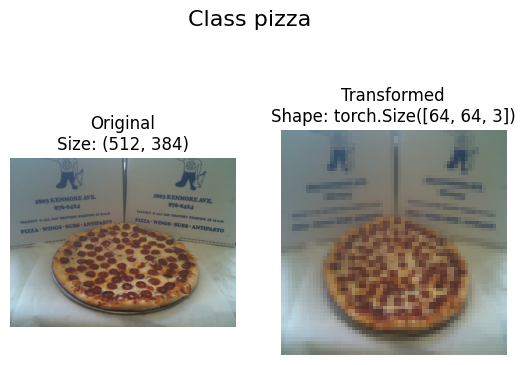

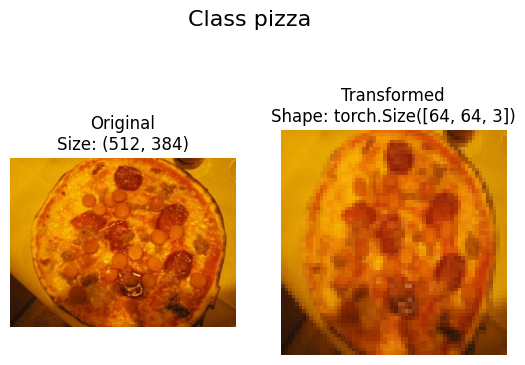

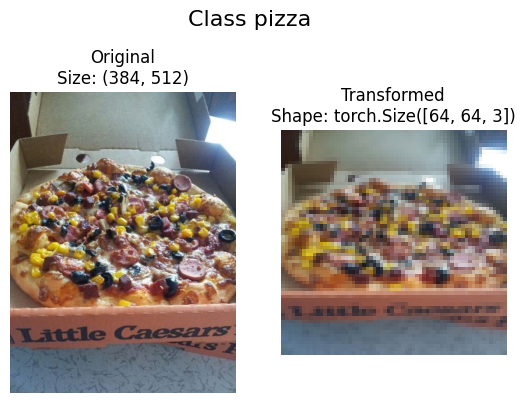

In [73]:
def plot_transormed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)  

            transformed_image = transform(f).permute(1,2,0) 
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)
            fig.suptitle(f"Class {image_path.parent.stem}", fontsize=16)


plot_transormed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=None)

In [74]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [75]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [76]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [77]:
len(train_data), len(test_data)

(225, 75)

In [78]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [79]:
img, label = train_data[0][0], train_data[0][1]
img, class_names[label]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

Original shape: torch.Size([3, 64, 64])
Image permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

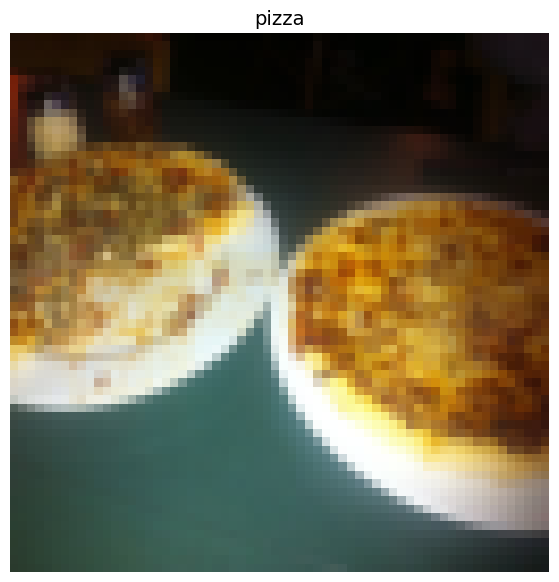

In [80]:
img_permute = img.permute(1,2,0)

print(f"Original shape: {img.shape}")
print(f"Image permute: {img_permute.shape}")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

In [81]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1bfa37bfe30>,
 <torch.utils.data.dataloader.DataLoader at 0x1bf9bafce30>)

In [82]:

len(train_dataloader), len(test_dataloader)

(8, 3)

In [83]:
img, label = next(iter(train_dataloader))

print(f"Image size: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image size: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [84]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [85]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [86]:
target_directory = train_dir
print(target_directory)

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [87]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [88]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    classes  = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
    
    class_to_idx = {class_name:i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [89]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [90]:
class ImageFolderCustom(Dataset):
    def __init__(self, 
                 targ_dir: str, 
                 transform=None):
        super().__init__()
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)


    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img), class_idx
        else: 
            return img, class_idx


In [91]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [92]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1bf9bb4af90>,
 <__main__.ImageFolderCustom at 0x1bf9c1d8230>)

In [93]:
len(train_data), len(train_data_custom)

(225, 225)

In [94]:
len(test_data), len(test_data_custom)

(75, 75)

In [95]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [96]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    if n > 10:
        n = 10
        display_shape = False
        print(f"For displpay, purposes, n shouldn't be larger than 10, setting to 10")

    if seed:
        random.seed(seed)


    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16,8))


    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1,2,0)

        plt.subplot(1,n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)        

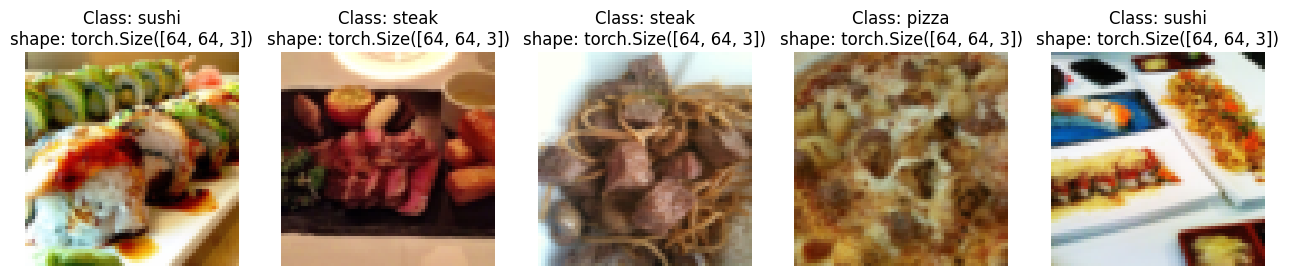

In [97]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

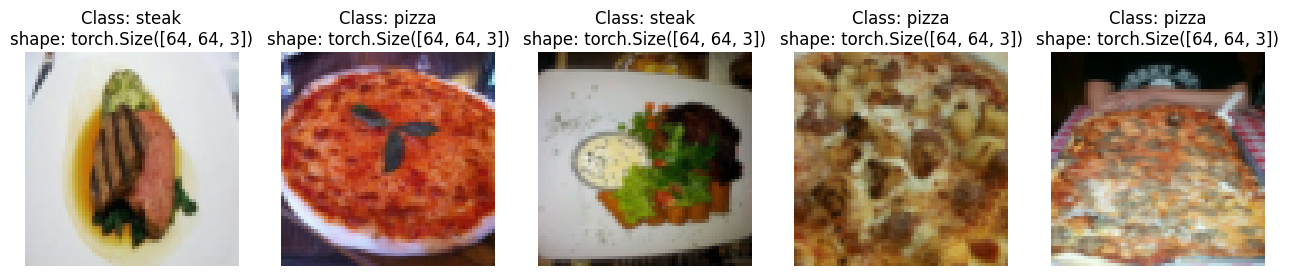

In [98]:
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [99]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1bf9bb86ba0>,
 <torch.utils.data.dataloader.DataLoader at 0x1bf9c14d5e0>)

In [100]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [101]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [102]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

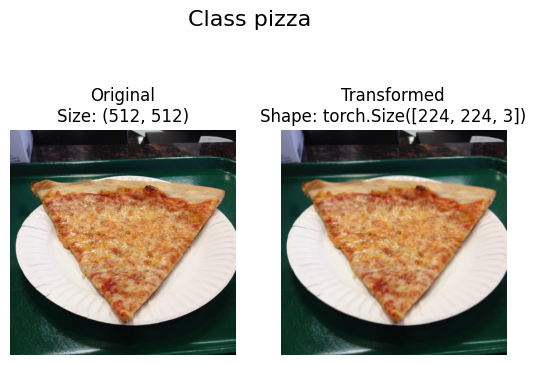

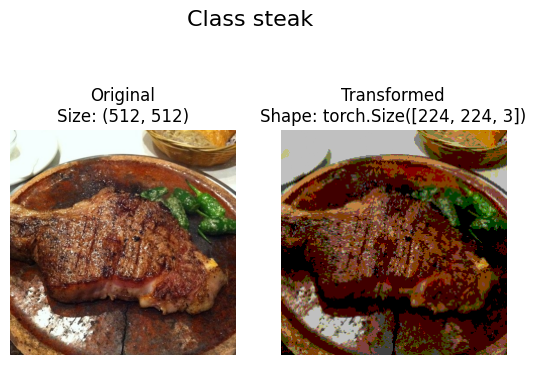

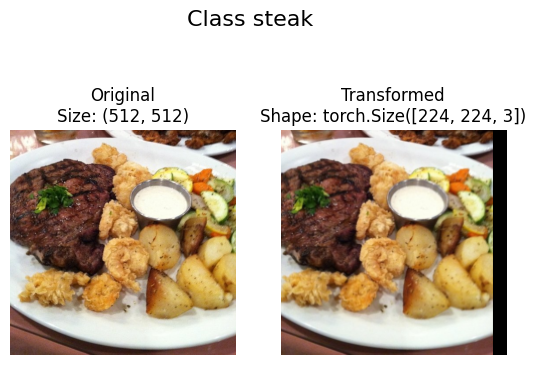

In [103]:
plot_transormed_images(image_paths=image_path_list,
                       transform=train_transforms,
                       n=3,
                       seed=None)

In [104]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [133]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = 2

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [134]:
NUM_WORKERS

2

In [155]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)                      
        )                      
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units, 
                        out_channels=hidden_units, 
                        kernel_size=3, 
                        stride=1, 
                        padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)                      
        )    

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [156]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [157]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [158]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9127e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0238e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7226e-03,  8.3785e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2131e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [159]:
import torchinfo
from torchinfo import summary

summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [160]:
import torch.utils.data.dataloader


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [161]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = torch.argmax(test_pred_logits, dim=1)
            test_acc += (test_pred_labels==y).sum().item() / len(test_pred_labels)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc        

In [162]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,          
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
    
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        
        print(f"Epoch: {epoch} | Train loss {train_loss:.4f}, Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results


In [163]:
device

'cuda'

In [168]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 7

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()
print(device)
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)
end_time = timer()

print(f"Total training time: {end_time-start_time:.4f} sec")

cuda


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 0 | Train loss 1.1063, Train acc: 0.3047 | Test loss: 1.0983, Test acc: 0.3011
Epoch: 1 | Train loss 1.0998, Train acc: 0.3281 | Test loss: 1.0697, Test acc: 0.5417
Epoch: 2 | Train loss 1.0868, Train acc: 0.4883 | Test loss: 1.0806, Test acc: 0.4924
Epoch: 3 | Train loss 1.0842, Train acc: 0.4023 | Test loss: 1.0609, Test acc: 0.5833
Epoch: 4 | Train loss 1.0663, Train acc: 0.4141 | Test loss: 1.0655, Test acc: 0.5644
Epoch: 5 | Train loss 1.0307, Train acc: 0.4375 | Test loss: 1.0147, Test acc: 0.5426
Epoch: 6 | Train loss 0.9884, Train acc: 0.4219 | Test loss: 0.9351, Test acc: 0.6042
Total training time: 54.5816 sec


In [169]:
def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    accuracy = results["train_acc"]
    test_acc = results["test_acc"]

    epochs = range(len(results["train_loss"]))
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, c='b', label='train_loss')
    plt.plot(epochs, test_loss, c='r', label='test_loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, c='b', label='train_accuracy')
    plt.plot(epochs, test_acc, c='r', label='test_accuracy')
    plt.title('Accuracy')
    plt.ylabel("Accuracy")
    plt.xlabel('Epochs')
    plt.legend()


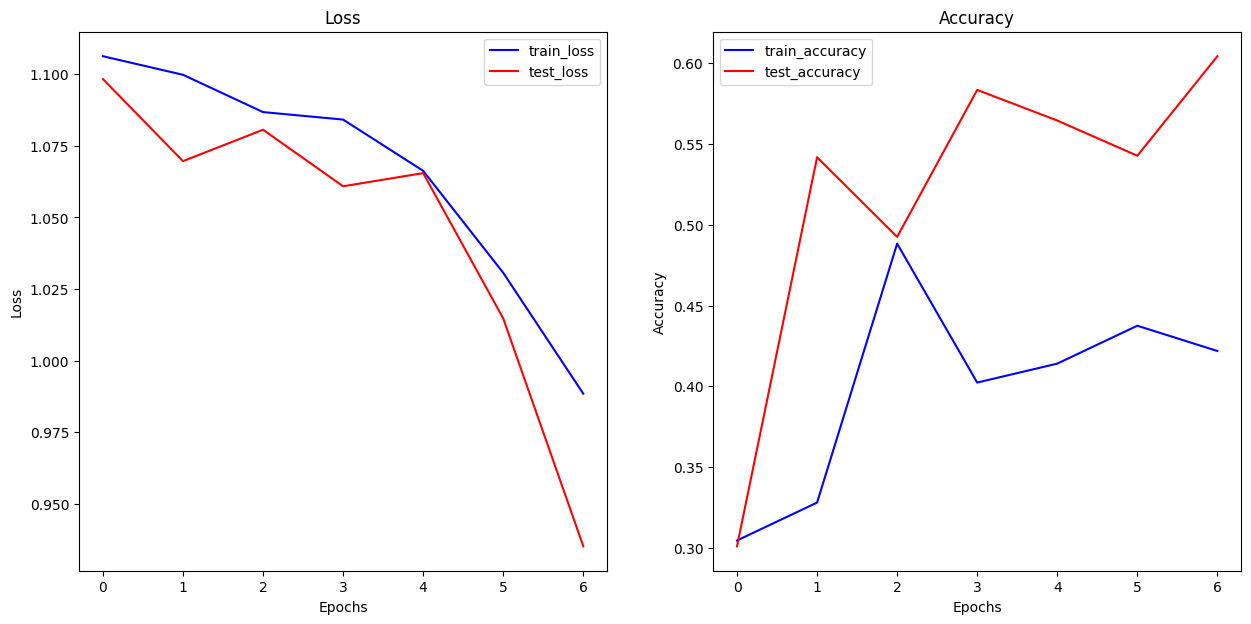

In [170]:
plot_loss_curves(model_0_results)

In [171]:
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [172]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [176]:
import os
BATCH_SIZE = 32
NUM_WORKERS = 2
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)



In [181]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
NUM_EPOCHS = 7

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)


start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.4f} sec")

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 0 | Train loss 1.1069, Train acc: 0.3086 | Test loss: 1.0991, Test acc: 0.2604
Epoch: 1 | Train loss 1.1019, Train acc: 0.3164 | Test loss: 1.0717, Test acc: 0.5417
Epoch: 2 | Train loss 1.0915, Train acc: 0.4414 | Test loss: 1.0843, Test acc: 0.4924
Epoch: 3 | Train loss 1.0913, Train acc: 0.3164 | Test loss: 1.0677, Test acc: 0.5833
Epoch: 4 | Train loss 1.0860, Train acc: 0.3594 | Test loss: 1.0750, Test acc: 0.5436
Epoch: 5 | Train loss 1.0672, Train acc: 0.5273 | Test loss: 1.0445, Test acc: 0.6042
Epoch: 6 | Train loss 1.0759, Train acc: 0.3477 | Test loss: 1.0014, Test acc: 0.6042
Total training time: 51.8580 sec


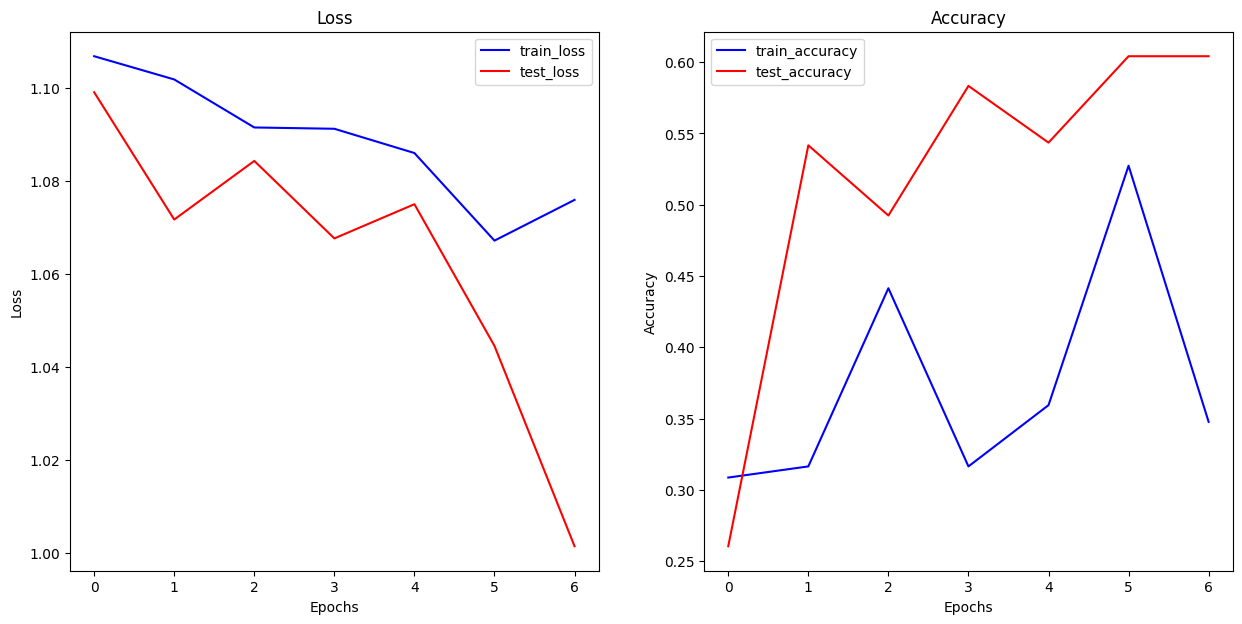

In [182]:
plot_loss_curves(model_1_results)

In [183]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106318,0.304688,1.098340,0.301136
1,1.099835,0.328125,1.069670,0.541667
2,1.086803,0.488281,1.080643,0.492424
3,1.084190,0.402344,1.060888,0.583333
4,1.066289,0.414062,1.065483,0.564394
5,1.030661,0.437500,1.014715,0.542614
6,0.988423,0.421875,0.935149,0.604167


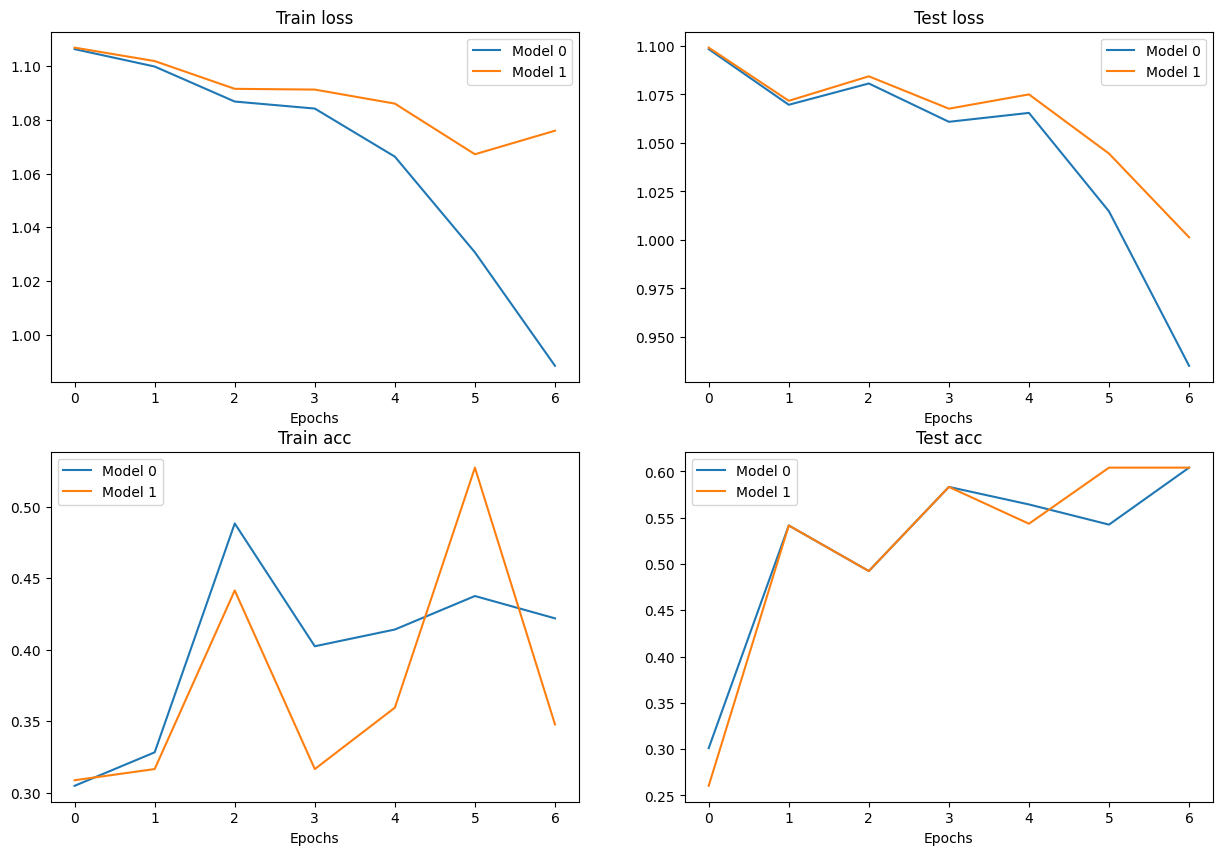

In [186]:
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.title('Train loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.title('Test loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.title('Train acc')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label='Model 0')
plt.plot(epochs, model_1_df['test_acc'], label='Model 1')
plt.title('Test acc')
plt.xlabel('Epochs')
plt.legend()


In [190]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists")


In [203]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(custom_image_path)
custom_image_uint8.shape, custom_image_uint8.dtype

(torch.Size([3, 4032, 3024]), torch.uint8)

In [204]:
custom_image = custom_image_uint8.type(torch.float32) / 255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [213]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed = custom_image_transform(custom_image)
print(custom_image.shape)
print(custom_image_transformed.shape)

torch.Size([3, 4032, 3024])
torch.Size([3, 64, 64])


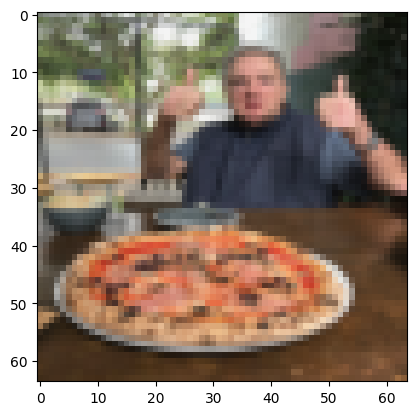

In [214]:
plt.imshow(custom_image_transformed.permute(1,2,0));

In [ ]:
custom_image_transformed = custom_image_transformed.unsqueeze(dim=0)


tensor([2], device='cuda:0')


In [224]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_labels = custom_image_pred_probs.argmax(dim=1) 

custom_image_pred_probs, custom_image_labels, class_names[custom_image_labels] 

(tensor([[0.3138, 0.2823, 0.4039]], device='cuda:0'),
 tensor([2], device='cuda:0'),
 'sushi')

In [225]:
model_0.eval()
with torch.inference_mode():
    custom_image_pred = model_0(custom_image_transformed.to(device))

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_labels = custom_image_pred_probs.argmax(dim=1) 

custom_image_pred_probs, custom_image_labels, class_names[custom_image_labels]

(tensor([[0.3259, 0.2596, 0.4145]], device='cuda:0'),
 tensor([2], device='cuda:0'),
 'sushi')

In [228]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
    target_image = torchvision.io.read_image(image_path).type(torch.float32)
    target_image = target_image / 255
    if transform:
        target_image = transform(target_image)
    model.to(device)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)
        target_image_pred = model(target_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = target_image_pred_probs.argmax(1)

    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis('off')    


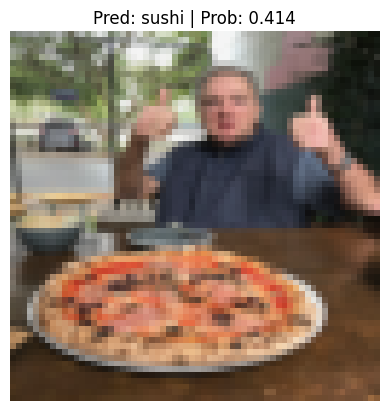

In [231]:
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)